In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import astropy.units as u
import astropy.constants as const
plt.style.use(['science'])
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [3]:
msun = u.M_sun
rsun = u.R_sun
G = const.G
day = u.day
meter = u.meter
kms = (u.km) / (u.s)

In [4]:
def v_orb(primary_mass, secondary_mass, semi_major_axis):
    """
    Computes the orbital velocity.

    Parameters:
        primary_mass (float): Mass of the primary star (kg).
        secondary_mass (float): Mass of the secondary star (kg).
        semi_major_axis (float): Orbital semi-major axis (m).

    Returns:
        float: Orbital velocity (m/s).
    """
    return (np.sqrt(G * (primary_mass + secondary_mass) / semi_major_axis)).to('km/s')

def P_orb(primary_mass, secondary_mass, semi_major_axis):
    """
    Computes the orbital period.

    Parameters:
        primary_mass (float): Mass of the primary star (kg).
        secondary_mass (float): Mass of the secondary star (kg).
        semi_major_axis (float): Orbital semi-major axis (m).

    Returns:
        float: Orbital period (days).
    """
    return (2 * pi * np.sqrt(semi_major_axis**3 / (G * (primary_mass + secondary_mass)))).to('day')

def pre_SN_a(M1, M2, P):
    """
    Computes the orbital period.

    Parameters:
        primary_mass (float): Mass of the primary star (kg).
        secondary_mass (float): Mass of the secondary star (kg).
        semi_major_axis (float): Orbital semi-major axis (m).

    Returns:
        float: Orbital period (days).
    """
    return (((P / (2*pi))**2 * G * (M1 + M2))**(1/3)).to('Rsun')

In [5]:
def func(Y, t, G, m1, m2):

    X1, Y1, Z1, X2, Y2, Z2, VX1, VY1, VZ1, VX2, VY2, VZ2 = Y
    r = np.sqrt((X2 - X1)**2 + (Y2 - Y1)**2 + (Z2 - Z1)**2)

    dX1dt = VX1
    dY1dt = VY1
    dZ1dt = VZ1
    dX2dt = VX2
    dY2dt = VY2
    dZ2dt = VZ2

    dVX1dt = G * m2 * (X2 - X1) / (r**3)
    dVY1dt = G * m2 * (Y2 - Y1) / (r**3)
    dVZ1dt = G * m2 * (Z2 - Z1) / (r**3)
    dVX2dt = G * m1 * (X1 - X2) / (r**3)
    dVY2dt = G * m1 * (Y1 - Y2) / (r**3)
    dVZ2dt = G * m1 * (Z1 - Z2) / (r**3)

    dYdt = [dX1dt, dY1dt, dZ1dt, dX2dt, dY2dt, dZ2dt,
            dVX1dt, dVY1dt, dVZ1dt, dVX2dt, dVY2dt, dVZ2dt]
    
    return dYdt

In [9]:
#Initial condtions
m1 = 8 * msun
m2 = 50 * msun
e = 0
P = 8 * day
kms = (u.km) / (u.s)
pi = np.pi
a = pre_SN_a(m1, m2, P)
vorb = v_orb(m1, m2, a)

X1_init = ((m2 / (m1+m2)) * a).si.value
Y1_init = (0 * rsun).si.value
Z1_init = (0 * rsun).si.value

X2_init = (-(m1 / (m1+m2)) * a).si.value
Y2_init = (0 * rsun).si.value
Z2_init = (0 * rsun).si.value

VX1_init = (0 * kms).si.value
VY1_init = ((m2 / (m1+m2)) * vorb).si.value
VZ1_init = (0 * kms).si.value

VX2_init = (0 * kms).si.value
VY2_init = (-(m1 / (m1+m2)) * vorb).si.value
VZ2_init = (0 * kms).si.value


Y_init = np.array([X1_init, Y1_init, Z1_init, X2_init, Y2_init, Z2_init,VX1_init, VY1_init, VZ1_init, VX2_init, VY2_init, VZ2_init])

In [10]:
t = np.linspace(0 * day, P, 1000).si.value

In [11]:
sol = sp.integrate.odeint(func, Y_init, t, args = (G.si.value, m1.si.value, m2.si.value))

In [ ]:
plt.figure(figsize = (5,5))
X1 = (sol[:,0] * meter).to('Rsun')
Y1 = (sol[:,1] * meter).to('Rsun')
X2 = (sol[:,3] * meter).to('Rsun')
Y2 = (sol[:,4] * meter).to('Rsun')

plt.plot(X1, Y1, label = 'Progenitor')
plt.plot(X2, Y2, label = 'Companion')
plt.xlim(-160,160)
plt.ylim(-160,160)
plt.legend()

In [76]:
#Initial condtions
m1 = 15 * msun
m2 = 10 * msun
m1_post_SN = m1 - (m1 + m2)/2 # + 0.5 * msun
kick = (np.array([0, 0, 0]) * kms).si.value
e = 0
P = 8 * day
kms = (u.km) / (u.s)
pi = np.pi
a = pre_SN_a(m1, m2, P)
vorb = v_orb(m1, m2, a)

X1_init = ((m2 / (m1+m2)) * a).si.value
Y1_init = (0 * rsun).si.value
Z1_init = (0 * rsun).si.value

X2_init = (-(m1 / (m1+m2)) * a).si.value
Y2_init = (0 * rsun).si.value
Z2_init = (0 * rsun).si.value

VX1_init = (0 * kms).si.value
VY1_init = ((m2 / (m1+m2)) * vorb).si.value
VZ1_init = (0 * kms).si.value

VX2_init = (0 * kms).si.value
VY2_init = (-(m1 / (m1+m2)) * vorb).si.value
VZ2_init = (0 * kms).si.value


Y_init = np.array([X1_init, Y1_init, Z1_init, X2_init, Y2_init, Z2_init,VX1_init, VY1_init, VZ1_init, VX2_init, VY2_init, VZ2_init])

In [77]:
N = 2500
t = np.linspace(0 * day, 20*P, N).si.value

#orbit before explosion
sol = sp.integrate.odeint(func, Y_init, t, args = (G.si.value, m1.si.value, m2.si.value))

In [78]:
m1_array = np.ones(N) * m1
X1 = (sol[:,0] * meter).to('Rsun')
Y1 = (sol[:,1] * meter).to('Rsun')
Z1 = (sol[:,2] * meter).to('Rsun')
X2 = (sol[:,3] * meter).to('Rsun')
Y2 = (sol[:,4] * meter).to('Rsun')
Z2 = (sol[:,5] * meter).to('Rsun')
X_com = (m1_array * X1 + m2 * X2) / (m1_array + m2)
Y_com = (m1_array * Y1 + m2 * Y2) / (m1_array + m2)
Z_com = (m1_array * Z1 + m2 * Z2) / (m1_array + m2)

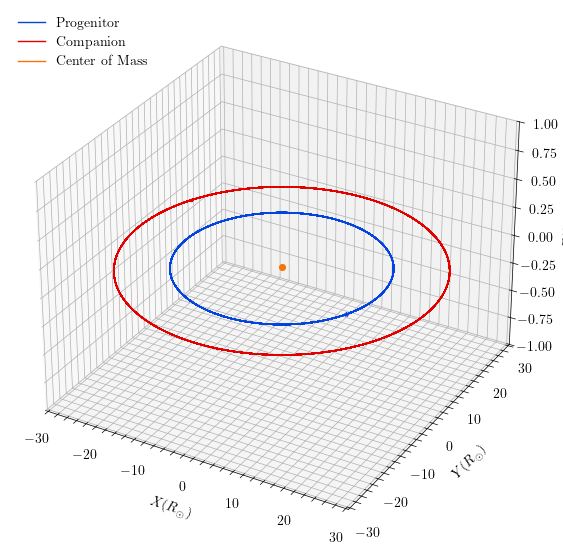

In [79]:
scale = 3

# Set up the figure and 3D axes
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Initialize lines and markers
ln1_line, = ax.plot([], [], [], color='xkcd:blue', label='Progenitor')  # Line for Star 1
ln2_line, = ax.plot([], [], [], color='xkcd:red', label='Companion')    # Line for Star 2
ln3_line, = ax.plot([], [], [], color='xkcd:orange', label='Center of Mass')    # Line for Center of Mass

ln1_marker, = ax.plot([], [], [], color='xkcd:blue', marker='*', markersize=(m1.value / scale)**(2/3))  # Marker for Star 1
ln2_marker, = ax.plot([], [], [], color='xkcd:red', marker='*', markersize=(m2.value / scale)**(2/3))  # Marker for Star 2
ln3_marker, = ax.plot([], [], [], color='xkcd:orange', marker='o', markersize=((m1+m2).value / scale)**(2/3))  # Marker for Center of Mass

# Initialization function
def init():
    ax.legend(loc='upper left')
    ax.set_xlabel(r'$X(R_{\odot})$')
    ax.set_ylabel(r'$Y(R_{\odot})$')
    ax.set_zlabel(r'$Z(R_{\odot})$')
    return [ln1_line, ln2_line, ln3_line, ln1_marker, ln2_marker, ln3_marker]

# Update function
def update(frame):
    # Update line trajectories
    ln1_line.set_data(X1[:frame], Y1[:frame])
    ln1_line.set_3d_properties(Z1[:frame])
    
    ln2_line.set_data(X2[:frame], Y2[:frame])
    ln2_line.set_3d_properties(Z2[:frame])

    ln3_line.set_data(X_com[:frame], Y_com[:frame])
    ln3_line.set_3d_properties(Z_com[:frame])

    # Update marker for the last point
    ln1_marker.set_data([X1[:frame][-1].value], [Y1[:frame][-1].value])
    ln1_marker.set_3d_properties([Z1[:frame][-1].value])
    
    ln2_marker.set_data([X2[:frame][-1].value], [Y2[:frame][-1].value])
    ln2_marker.set_3d_properties([Z2[:frame][-1].value])

    ln3_marker.set_data([X_com[:frame][-1].value], [Y_com[:frame][-1].value])
    ln3_marker.set_3d_properties([Z_com[:frame][-1].value])

    # Dynamically adjust axis limits
    xmin = min(X1[:frame].min(), X2[:frame].min()) - 1*rsun
    xmax = max(X1[:frame].max(), X2[:frame].max()) + 1*rsun
    ymin = min(Y1[:frame].min(), Y2[:frame].min()) - 1*rsun
    ymax = max(Y1[:frame].max(), Y2[:frame].max()) + 1*rsun
    zmin = min(Z1[:frame].min(), Z2[:frame].min()) - 1*rsun
    zmax = max(Z1[:frame].max(), Z2[:frame].max()) + 1*rsun

    ax.set_xlim(xmin.value, xmax.value)
    ax.set_ylim(ymin.value, ymax.value)
    ax.set_zlim(zmin.value, zmax.value)

    return [ln1_line, ln2_line, ln3_line, ln1_marker, ln2_marker, ln3_marker]

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, N, 10),  # Start from 1
                    init_func=init, blit=False, interval=5)

# Save the animation as a GIF
ani.save('circular_orbit.gif', writer='pillow', dpi=200)

In [73]:
N = 2500
t = np.linspace(0 * day, 20*P, N).si.value

#time of explosion
t_explode = 3*P.si.value

#orbit before explosion
t_pre_SN = t[t <= t_explode]
t_end = t_pre_SN[-1]
sol_pre_SN = sp.integrate.odeint(func, Y_init, t_pre_SN, args = (G.si.value, m1.si.value, m2.si.value))

#orbit after explosion
t_post_SN = t[t > t_explode]
t_post_SN = np.insert(t_post_SN, 0, t_end)
sol_pre_SN[-1,6:9] += kick
Y_init_post_SN = sol_pre_SN[-1]
sol_post_SN = sp.integrate.odeint(func, Y_init_post_SN, t_post_SN, args = (G.si.value, m1_post_SN.si.value, m2.si.value))

In [74]:
sol = np.vstack((sol_pre_SN[:-1],sol_post_SN))
m1_array = np.ones(N) * m1
m1_array[len(sol_pre_SN):] = m1_post_SN
X1 = (sol[:,0] * meter).to('Rsun')
Y1 = (sol[:,1] * meter).to('Rsun')
Z1 = (sol[:,2] * meter).to('Rsun')
X2 = (sol[:,3] * meter).to('Rsun')
Y2 = (sol[:,4] * meter).to('Rsun')
Z2 = (sol[:,5] * meter).to('Rsun')
X_com = (m1_array * X1 + m2 * X2) / (m1_array + m2)
Y_com = (m1_array * Y1 + m2 * Y2) / (m1_array + m2)
Z_com = (m1_array * Z1 + m2 * Z2) / (m1_array + m2)

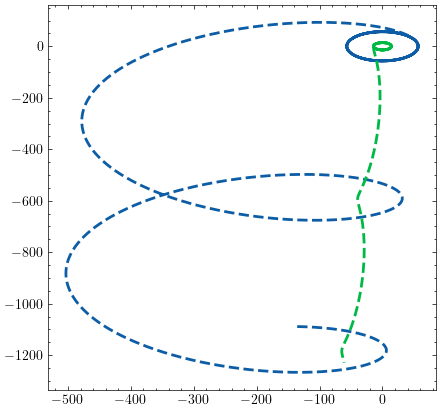

In [63]:
n = len(t_pre_SN)
lw = 2
plt.figure(figsize = (5,5))
plt.plot(X1[:n], Y1[:n], label = 'Progenitor', color = 'C0', lw = lw)
plt.plot(X2[:n], Y2[:n], label = 'Companion', color = 'C1', lw = lw)

plt.plot(X1[n:], Y1[n:], ls = 'dashed', color = 'C0', lw = lw)
plt.plot(X2[n:], Y2[n:], ls ='dashed', color = 'C1', lw = lw)

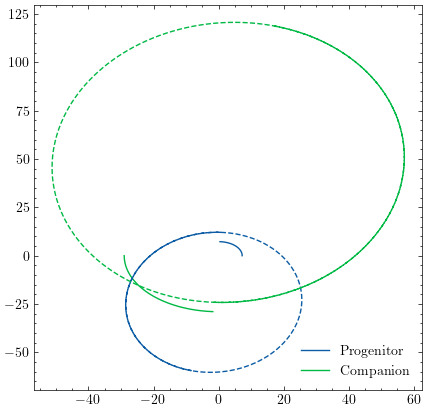

In [11]:
plt.figure(figsize = (5,5))
X1 = (sol_pre_SN[:,0] * meter).to('Rsun')
Y1 = (sol_pre_SN[:,1] * meter).to('Rsun')
X2 = (sol_pre_SN[:,3] * meter).to('Rsun')
Y2 = (sol_pre_SN[:,4] * meter).to('Rsun')
X_com = (m1 * X1 + m2 * X2) / (m1 + m2)
Y_com = (m1 * Y1 + m2 * Y2) / (m1 + m2)

plt.plot(X1 - X_com, Y1 - Y_com, label = 'Progenitor')
plt.plot(X2 - X_com, Y2 - Y_com, label = 'Companion')
#plt.plot(X_com, Y_com, label = 'Center of Mass')

X1 = (sol_post_SN[:,0] * meter).to('Rsun')
Y1 = (sol_post_SN[:,1] * meter).to('Rsun')
X2 = (sol_post_SN[:,3] * meter).to('Rsun')
Y2 = (sol_post_SN[:,4] * meter).to('Rsun')
X_com = (m1_post_SN * X1 + m2 * X2) / (m1_post_SN + m2)
Y_com = (m1_post_SN * Y1 + m2 * Y2) / (m1_post_SN + m2)

plt.plot(X1 - X_com, Y1 - Y_com, color = 'C0', ls = 'dashed')
plt.plot(X2 - X_com, Y2 - Y_com, color = 'C1', ls = 'dashed')
#plt.plot(X_com, Y_com, ls = 'dashed')

plt.legend()

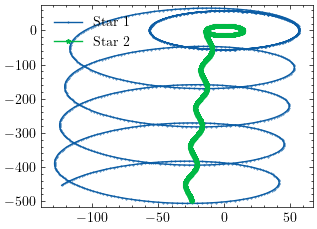

In [14]:
# Specific frame index where the transition happens
transition_frame = len(t_pre_SN)  # Replace with your value

fig, ax = plt.subplots()
ln1, = ax.plot([], [], color='C0', marker='*', markersize=(m1.value/10)**(2/3), label='Star 1')  # Initially yellow star
ln2, = ax.plot([], [], color='C1', marker='*', markersize=(m2.value/10)**(2/3), label='Star 2')  # Initially yellow star

# Initialization function
def init():
    ax.legend()
    return [ln1, ln2]

# Update function
def update(frame):
    # Update data for both stars
    ln1.set_data(X1[:frame], Y1[:frame])
    ln2.set_data(X2[:frame], Y2[:frame])
    
    # Change marker of Star 1 after the transition frame
    if frame < transition_frame:
        ln1.set_marker('*')  # Yellow star
        ln1.set_color('C0')
    else:
        ln1.set_marker('o')  # Black circle
        ln1.set_color('C0')
        ln1.set_markersize((m1_post_SN.value/10)**(2/3))
    
    # Star 2 remains a yellow star
    ln2.set_marker('*')
    ln2.set_color('C1')



    #Dynamically adjust axis limits
    xmin = min(X1[:frame+1].min(), X2[:frame+1].min()) - 10*rsun
    xmax = max(X1[:frame+1].max(), X2[:frame+1].max()) + 10*rsun
    ymin = min(Y1[:frame+1].min(), Y2[:frame+1].min()) - 10*rsun
    ymax = max(Y1[:frame+1].max(), Y2[:frame+1].max()) + 10*rsun
    ax.set_xlim(xmin.value, xmax.value)
    ax.set_ylim(ymin.value, ymax.value)
    
    return [ln1, ln2]

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, N, 10),
                    init_func=init, blit=False, interval=15)

# Save the animation as a GIF
ani.save('SN_explosion.gif', writer='pillow', dpi=200)


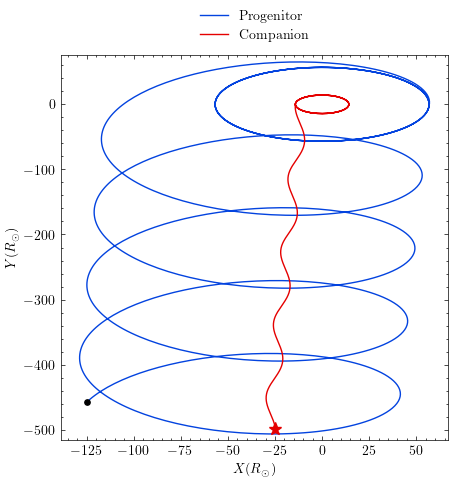

In [34]:
# Specific frame index where the transition happens
transition_frame = len(t_pre_SN)  # Replace with your value
scale = 2

fig, ax = plt.subplots(figsize = (5,5))
ln1_line, = ax.plot([], [], color='xkcd:blue', label='Progenitor')  # Line for Star 1
ln2_line, = ax.plot([], [], color='xkcd:red', label='Companion')  # Line for Star 2

ln1_marker, = ax.plot([], [], color='xkcd:blue', marker='*', markersize=(m1.value/scale)**(2/3))  # Marker for Star 1
ln2_marker, = ax.plot([], [], color='xkcd:red', marker='*', markersize=(m2.value/scale)**(2/3))  # Marker for Star 2

# Initialization function
def init():
    # Keep your legend and limits intact
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.15))
    ax.set_xlabel(r'$X(R_{\odot})$')
    ax.set_ylabel(r'$Y(R_{\odot})$')
    return [ln1_line, ln2_line, ln1_marker, ln2_marker]

# Update function
def update(frame):
    # Update line trajectories
    ln1_line.set_data(X1[:frame], Y1[:frame])
    ln2_line.set_data(X2[:frame], Y2[:frame])

    # Update marker for the last point
    ln1_marker.set_data([X1[:frame][-1].value], [Y1[:frame][-1].value])
    ln2_marker.set_data([X2[:frame][-1].value], [Y2[:frame][-1].value])
    
    # Change marker style and color for Star 1 after the transition frame
    if frame < transition_frame:
        ln1_marker.set_marker('*')  # Yellow star
        ln1_marker.set_color('xkcd:blue')
    else:
        ln1_marker.set_marker('o')  # Black circle
        ln1_marker.set_color('xkcd:black')
        ln1.set_markersize((m1_post_SN.value/scale)**(2/3))
    
    #Dynamically adjust axis limits
    xmin = min(X1[:frame].min(), X2[:frame].min()) - 10*rsun
    xmax = max(X1[:frame].max(), X2[:frame].max()) + 10*rsun
    ymin = min(Y1[:frame].min(), Y2[:frame].min()) - 10*rsun
    ymax = max(Y1[:frame].max(), Y2[:frame].max()) + 10*rsun
    ax.set_xlim(xmin.value, xmax.value)
    ax.set_ylim(ymin.value, ymax.value)
    
    return [ln1_line, ln2_line, ln1_marker, ln2_marker]

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, N, 10),  # Start from 1
                    init_func=init, blit=False, interval=5)

# Save the animation as a GIF
ani.save('SN_explosion.gif', writer='pillow', dpi=200)


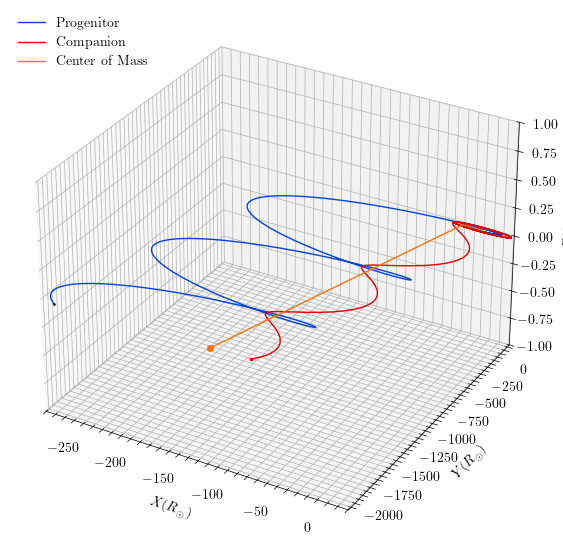

In [75]:
# Specific frame index where the transition happens
transition_frame = len(t_pre_SN)  # Replace with your value
scale = 3

# Set up the figure and 3D axes
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Initialize lines and markers
ln1_line, = ax.plot([], [], [], color='xkcd:blue', label='Progenitor')  # Line for Star 1
ln2_line, = ax.plot([], [], [], color='xkcd:red', label='Companion')    # Line for Star 2
ln3_line, = ax.plot([], [], [], color='xkcd:orange', label='Center of Mass')    # Line for Center of Mass

ln1_marker, = ax.plot([], [], [], color='xkcd:blue', marker='*', markersize=(m1.value / scale)**(2/3))  # Marker for Star 1
ln2_marker, = ax.plot([], [], [], color='xkcd:red', marker='*', markersize=(m2.value / scale)**(2/3))  # Marker for Star 2
ln3_marker, = ax.plot([], [], [], color='xkcd:orange', marker='o', markersize=((m1+m2).value / scale)**(2/3))  # Marker for Center of Mass

# Initialization function
def init():
    ax.legend(loc='upper left')
    ax.set_xlabel(r'$X(R_{\odot})$')
    ax.set_ylabel(r'$Y(R_{\odot})$')
    ax.set_zlabel(r'$Z(R_{\odot})$')
    return [ln1_line, ln2_line, ln3_line, ln1_marker, ln2_marker, ln3_marker]

# Update function
def update(frame):
    # Update line trajectories
    ln1_line.set_data(X1[:frame], Y1[:frame])
    ln1_line.set_3d_properties(Z1[:frame])
    
    ln2_line.set_data(X2[:frame], Y2[:frame])
    ln2_line.set_3d_properties(Z2[:frame])

    ln3_line.set_data(X_com[:frame], Y_com[:frame])
    ln3_line.set_3d_properties(Z_com[:frame])

    # Update marker for the last point
    ln1_marker.set_data([X1[:frame][-1].value], [Y1[:frame][-1].value])
    ln1_marker.set_3d_properties([Z1[:frame][-1].value])
    
    ln2_marker.set_data([X2[:frame][-1].value], [Y2[:frame][-1].value])
    ln2_marker.set_3d_properties([Z2[:frame][-1].value])

    ln3_marker.set_data([X_com[:frame][-1].value], [Y_com[:frame][-1].value])
    ln3_marker.set_3d_properties([Z_com[:frame][-1].value])

    # Change marker style and color for Star 1 after the transition frame
    if frame < transition_frame:
        ln1_marker.set_marker('*')  # Yellow star
        ln1_marker.set_color('xkcd:blue')
    else:
        ln1_marker.set_marker('o')  # Black circle
        ln1_marker.set_color('xkcd:black')
        ln1_marker.set_markersize((m1_post_SN.value / scale)**(2/3))

    # Dynamically adjust axis limits
    xmin = min(X1[:frame].min(), X2[:frame].min()) - 1*rsun
    xmax = max(X1[:frame].max(), X2[:frame].max()) + 1*rsun
    ymin = min(Y1[:frame].min(), Y2[:frame].min()) - 1*rsun
    ymax = max(Y1[:frame].max(), Y2[:frame].max()) + 1*rsun
    zmin = min(Z1[:frame].min(), Z2[:frame].min()) - 1*rsun
    zmax = max(Z1[:frame].max(), Z2[:frame].max()) + 1*rsun

    ax.set_xlim(xmin.value, xmax.value)
    ax.set_ylim(ymin.value, ymax.value)
    ax.set_zlim(zmin.value, zmax.value)

    return [ln1_line, ln2_line, ln3_line, ln1_marker, ln2_marker, ln3_marker]

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, N, 10),  # Start from 1
                    init_func=init, blit=False, interval=5)

# Save the animation as a GIF
ani.save('SN_explosion_3D_opposite_kick.gif', writer='pillow', dpi=200)